In [1]:
# Imports libraries

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px

In [2]:
#!pip install mpld3

In [3]:
from scipy.integrate import odeint


In [4]:
#Imports national data

df = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales_T.csv',
                error_bad_lines=False
                 )

df= df.set_index('Fecha')

In [5]:
df.tail()

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos \nactivos confirmados
Fecha,,,,,,,,,,,,,,,,,
2020-12-24,1598.0,593310.0,NaN,16303.0,13214.0,741.0,2395.0,26870.0,13214.0,563793.0,550137.0,563457.0,NaN,82518.0,2555.0,56.0,NaN
2020-12-25,1597.0,595831.0,NaN,16358.0,14133.0,860.0,2520.0,27857.0,14133.0,565340.0,551616.0,565002.0,NaN,82871.0,2580.0,63.0,NaN
2020-12-26,1618.0,598394.0,NaN,16404.0,14275.0,864.0,2564.0,28613.0,14275.0,567715.0,553377.0,567376.0,NaN,83082.0,2374.0,82.0,NaN
2020-12-27,1105.0,600105.0,NaN,16443.0,13745.0,565.0,1711.0,28186.0,13745.0,569917.0,555476.0,569578.0,NaN,83161.0,2154.0,41.0,NaN
2020-12-28,1395.0,602028.0,NaN,16443.0,13572.0,489.0,1923.0,28198.0,13572.0,572013.0,557387.0,571674.0,NaN,83329.0,2001.0,39.0,NaN


In [6]:
#Looking for recovered data from 1st to 20th June

df.filter(like = '2020-06-', axis=0)

,Casos nuevos con sintomas,Casos totales,Casos recuperados,Fallecidos,Casos activos,Casos nuevos sin sintomas,Casos nuevos totales,Casos activos por FD,Casos activos por FIS,Casos recuperados por FIS,Casos recuperados por FD,Casos confirmados recuperados,Casos activos confirmados,Casos probables acumulados,Casos activos probables,Casos nuevos sin notificar,Casos \nactivos confirmados
Fecha,,,,,,,,,,,,,,,,,
2020-06-01,5082.0,105159.0,44946.0,1113.0,59100.0,389.0,5471.0,59100.0,NaN,NaN,44946.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-02,3206.0,108686.0,NaN,1188.0,21325.0,321.0,3527.0,59107.0,21325.0,86173.0,48391.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-03,4537.0,113628.0,NaN,1275.0,21605.0,405.0,4942.0,60011.0,21605.0,90748.0,52342.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04,4172.0,118292.0,NaN,1356.0,21305.0,492.0,4664.0,60711.0,21305.0,95631.0,56225.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-05,3790.0,122499.0,NaN,1448.0,21693.0,417.0,4207.0,60642.0,21693.0,99358.0,60409.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-06,4888.0,127745.0,NaN,1541.0,22387.0,358.0,5246.0,62352.0,22387.0,103817.0,63852.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-07,5760.0,134150.0,NaN,2190.0,24363.0,645.0,6405.0,65048.0,24363.0,107597.0,66912.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-08,4237.0,138846.0,NaN,2264.0,24334.0,459.0,4696.0,64849.0,24334.0,112248.0,71733.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-09,3587.0,142759.0,NaN,2283.0,23115.0,326.0,3913.0,64798.0,23115.0,117361.0,75678.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

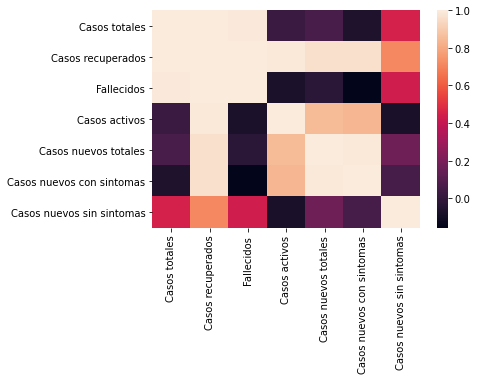

In [7]:
#Checking for data correlations

correlations = df[['Casos totales',
                   'Casos recuperados',
                   'Fallecidos',
                   'Casos activos',
                   'Casos nuevos totales',
                  'Casos nuevos con sintomas',
                  'Casos nuevos sin sintomas']].corr()
                   
sns.heatmap(correlations, 
            annot=False,
            )

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of symptomatic cases'),
 Text(0.5, 1.0, 'Symptomatic cases')]

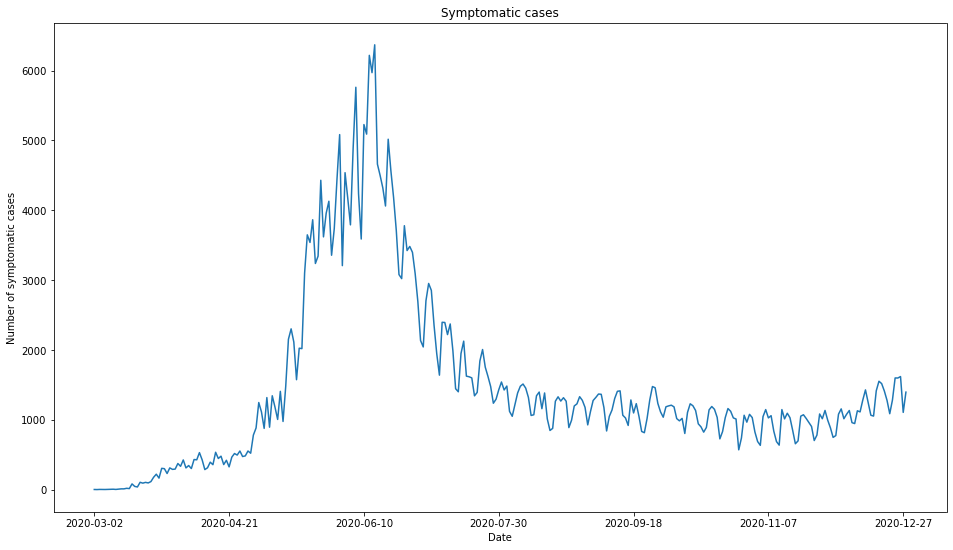

In [8]:
#Ploting Symptomatic cases

df['Casos nuevos con sintomas'].plot(figsize=(16, 9),
                                     x= 'Fecha',
                                     y= 'Casos nuevos con sintomas'
                                      ).set(xlabel='Date', 
                                            ylabel='Number of symptomatic cases', 
                                            title='Symptomatic cases')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of asymptomatic cases'),
 Text(0.5, 1.0, 'Asymptomatic cases')]

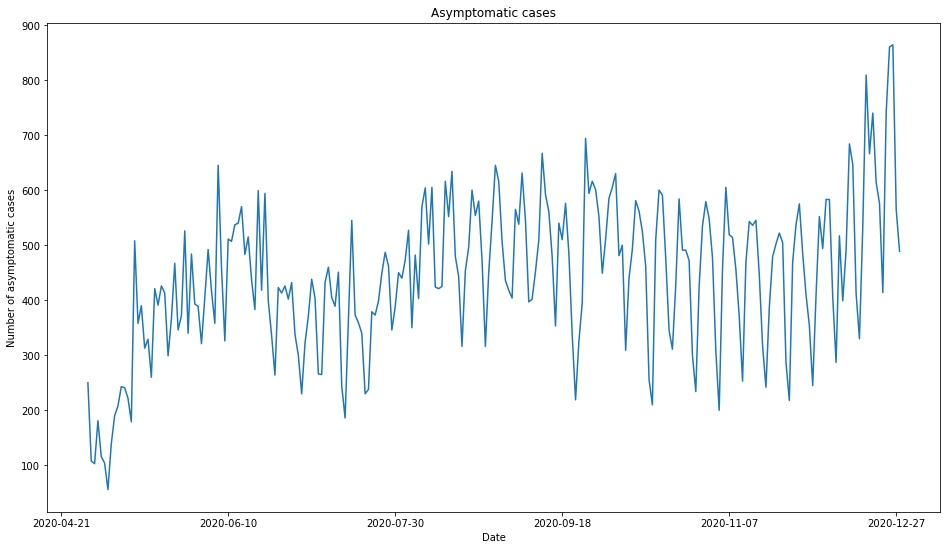

In [9]:
df['Casos nuevos sin sintomas'].plot(figsize=(16, 9)
                             ).set(xlabel="Date", 
                                   ylabel="Number of asymptomatic cases", 
                                   title="Asymptomatic cases")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of cases'),
 Text(0.5, 1.0, 'Total Chilean cases')]

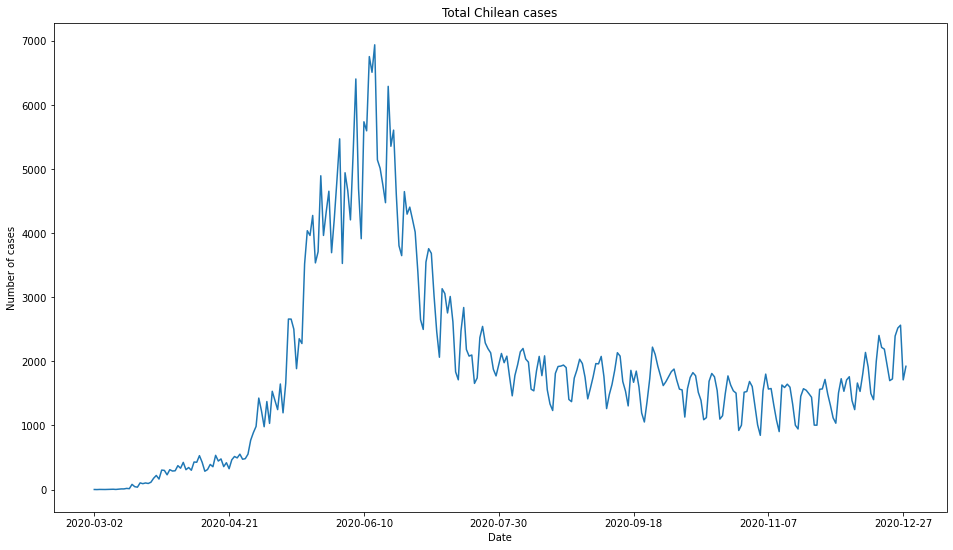

In [10]:
#Ploting Total Chilean cases

df['Casos nuevos totales'].plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Number of cases", 
            title="Total Chilean cases")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of cases'),
 Text(0.5, 1.0, 'Total Chilean cases')]

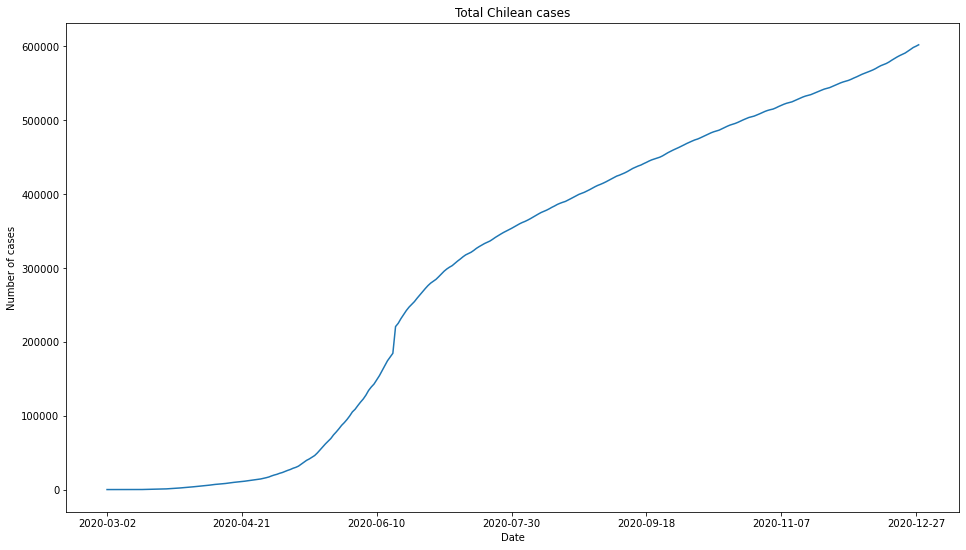

In [11]:
#Ploting Total Chilean cases

df['Casos totales'].plot(figsize=(16, 9)
      ).set(xlabel="Date", 
            ylabel="Number of cases", 
            title="Total Chilean cases")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Log10(Number of cases)'),
 Text(0.5, 1.0, 'Total Chilean cases in logarithmic scale')]

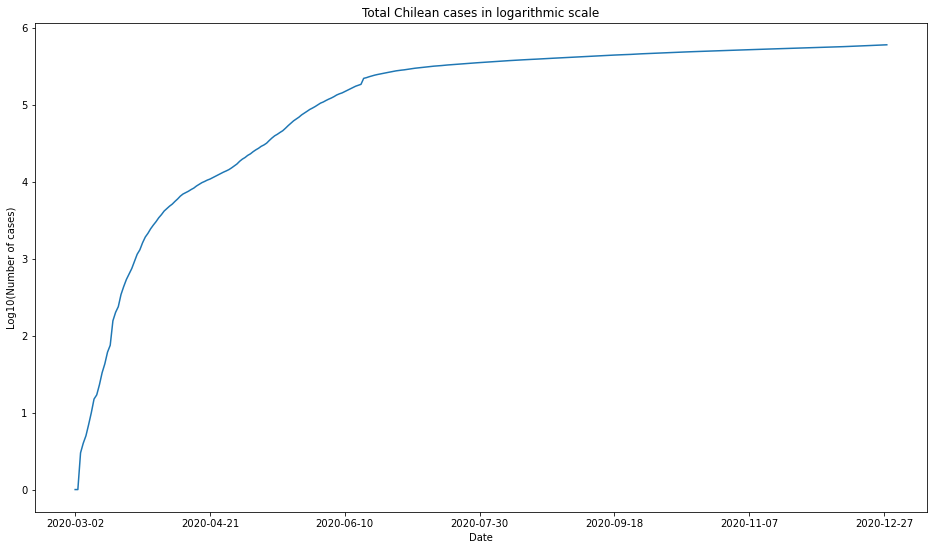

In [12]:
# Total cases in logarithmic scales

np.log10(df['Casos totales']).plot(figsize=(16, 9)
                                   ).set(xlabel="Date", 
                                         ylabel="Log10(Number of cases)", 
                                         title="Total Chilean cases in logarithmic scale")

In [13]:
pcr_cases = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto7/PCR_T.csv')
pcr_cases = pcr_cases.rename(columns={'Region':'Fecha'})
pcr_cases = pcr_cases.drop([0,1])
pcr_cases = pcr_cases.set_index('Fecha')

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of PCR test'),
 Text(0.5, 1.0, 'PCR test per region')]

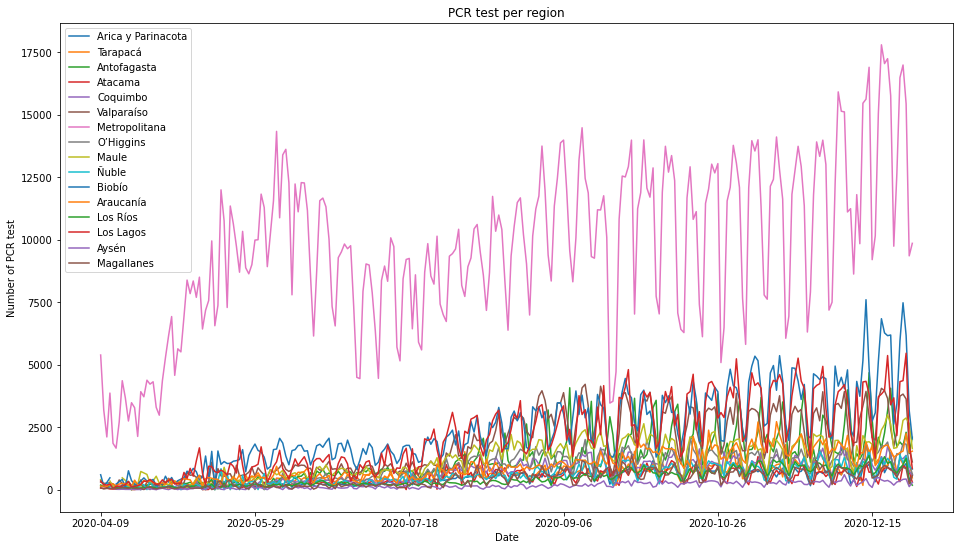

In [14]:
pcr_cases.plot(figsize=(16, 9)
              ).set(xlabel="Date",
                    ylabel="Number of PCR test",
                    title="PCR test per region")

### Background 

There is already information available about adapted SEIR models being used for modelling and fit diverse Covid19 data curves [1,2,3,4,5]. However, these agree that is utterly necesary to analyse each country under their own specific parameters, because the different approach taken against the pandemic, i.e. lockdown situations and population response to those measures behaves in a country specific way. For example, data for Chile has being analysed by Guerrero and Manríquez (2020) and Cabrera-Vives *et al* (2020). In both works cases were split into four main groups

- Susceptible (S(t)):  Fraction of each location’s population that is susceptible
- Exposed (E(t)):  Infected but not infectious
- Infectious (I(t)): Number of infectious people
- Recovered (R(t)): Number of recovered individuals as a function of time

Considering the variations of these variables as

\begin{equation} \frac{\partial S}{\partial t} = -\beta SI \end{equation}

\begin{equation}\frac{\partial E}{\partial t} = \beta SI -\sigma E \end{equation}

\begin{equation}\frac{\partial I}{\partial t} = \sigma E - \gamma I \end{equation}

\begin{equation}\frac{\partial R}{\partial t} = \gamma I \end{equation}

where 
             $\beta$ is the contagious rate, 
                     $\sigma^{-1}$ is the incubation period, 
 $\gamma^-1$ contagious period
 


However, Reiner *et al.* (2020) added new variables using COVID-19 hospital data, which allowed to estimate the number of individuals in hospital and in intensive care. Hospitalisation data therefore gets used in two ways: 
1. As a leading predictor of daily deaths 
2. As a statistic used to define the number of hospitalisations that result in deaths.

Also in this work other variables such as mobility, demography, altitude, population density, pollution, smoking, pneumonia seasonality, mask use, testing per capita and quarantine level were considered

\begin{equation} 
\frac{\partial S}{\partial t} = -\beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N} - \theta^+S
\end{equation}

\begin{equation}
\frac{\partial E}{\partial t} = \beta_{(t)} \frac{S(I_1 + I_2)^\alpha}{N}  -\sigma E + \theta^+ S - \theta^- E
\end{equation}

\begin{equation}
\frac{\partial I_1}{\partial t} = \sigma E - \gamma_1 I_1
\end{equation}

\begin{equation}
\frac{\partial I_2}{\partial t} = \gamma_1 I_1 - \gamma_2 I_2
\end{equation}

\begin{equation}
\frac{\partial R}{\partial t} = \gamma_2 I_2 + \theta^- E
\end{equation}

where 
- $\alpha$ represents a mixing coefficient to account for imperfect mixing within each location, 
- $\sigma$ is the rate at which infected individuals become infectious, 
- $\gamma_1$ is the rate at which infectious people transition out of the pre-symptomatic phase,
- $\gamma_2$ is the rate at which individuals recover. 
- $\theta$ are the corrections  mathematically described using $\theta^+$ and $\theta^-$ for the importation correction and the small location correction

This model does not distinguish between symptomatic and asymptomatic infections but has two infectious compartments ($I_1$ and $I_2$) to allow for interventions that would avoid focus on those who could not be symptomatic. $I_1$ is thus the pre-symptomatic compartment. 

These parameter values are drawn from distributions based on existing literature

$\beta$ regression coefficient constraints

Covariate | Time-varying | Lower Bound | Upper Bound | Covariate Coefficient | Definition
---|---|---|---|---|---
Pneumonia seasonality | Yes | 0.9 | 1.31 | 1.035 (0.90 to 1.31) | Proportion of pneumonia deaths to total deaths by week of the calendar year; by location
Mobility | Yes | 0 | ∞ | 9.45E-3 (95% UI: 7.10E-3 to 1.21E-2) | Composite indicator of multiple mobilitysources, expressed as percent reduction from "norm". Projected based on social distancing mandates
Mask Use | Yes | -0.52 | 0 | -0.502 (-0.520 to -0.380) | Percentage of the population who "always" wear a mask
Testing | Yes | -80 | 0 | -25.9 (-54.6 to -6.37) | Number of tests administered daily divided by population per location 
Air Quality | No | 0 | ∞ | 2.00E-5 (0.0 to 1.38E-4) | Population-weighted annual mean PM2.5 exposure 
Smoking Prevalence | No | 0 | 1 | 1.38E-2 (0.0 to 0.102) | Smoking exposure per capita (time invariant) (Adult age-standardised [15+ years], both sexes) 
LRI Mortality | No | 0 | ∞ | 5.89E-4 (0.0 to 4.65E-3) | age15+ age-standardised LRI mortality rate by location (time invariant, based on 2019 results) 
Altitude | No | 0 | ∞ | 1.38E-3 (0.0 to 8.97E-3) | Proportion population below 100 m altitude
Population Density | No | 0 |∞ | 2.5E-6 (0.0 to 4.6E-6) | Percentage of population living in areas more dense than 1,000 ppl per square km

Using the Runge-Kutta 4 algorithm the ODEs can be run forward to have a complete time-series of infections through the end of the year.



# Compartmentalisation

We separate population into several compartments, for example:
   - N: Total population
   - S: Susceptible (can still be infected, “healthy”)
   - E: Exposed (contracted the disease but is not yet infective) 
   - I: Infected (active cases)
   - R: Recovered (assuming were already infected and can't get infected again)
   - D: Dead (passed away from the disease)

Additional variables need to be used, such as:

 - $\beta$ (“beta”): the expected amount of people an infected person infects per day. For example, with a probability of 10% 10 people will infect 1 person per day (10% * 10 =10)
 - D: delay in number of days that an infected person has to spread the disease
 - $\gamma$: it's the rate of recovery, or the proportion of infected recovering per day $\gamma$:1/D
 - R₀: this is the basic reproduction number R₀, which is the total number of people an infected person infects. R₀: $\beta$*D. Hence R₀: $\beta / \gamma$
 - $\rho$: rate at which people die (e.g. when it takes 6 days to die, ρ will be 1/6)
 - $\alpha$: probability of going from infected to recovered and from infected to dead

In [15]:
# Considering the total chilean population

N = 18300000 #Chilean population; Source: World Bank

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of infectious cases'),
 Text(0.5, 1.0, 'Infectious people')]

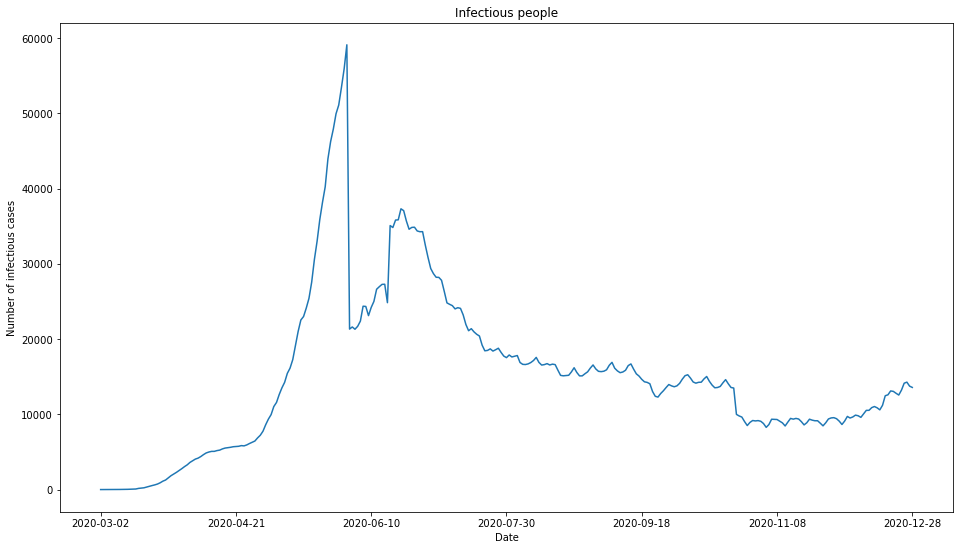

In [16]:
# Infectious cases
infectious = df['Casos activos'].dropna() # Chilean active cases

infectious.plot(figsize=(16, 9)
       ).set(xlabel="Date",
             ylabel="Number of infectious cases", 
             title="Infectious people")

In [17]:
# FIS Fecha inicio sintomas

#FD

df['Casos recuperados']


Fecha
2020-03-02    0.0
2020-03-03    0.0
2020-03-04    0.0
2020-03-05    0.0
2020-03-06    0.0
             ... 
2020-12-24    NaN
2020-12-25    NaN
2020-12-26    NaN
2020-12-27    NaN
2020-12-28    NaN
Name: Casos recuperados, Length: 302, dtype: float64

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of recovered cases'),
 Text(0.5, 1.0, 'Recovered cases')]

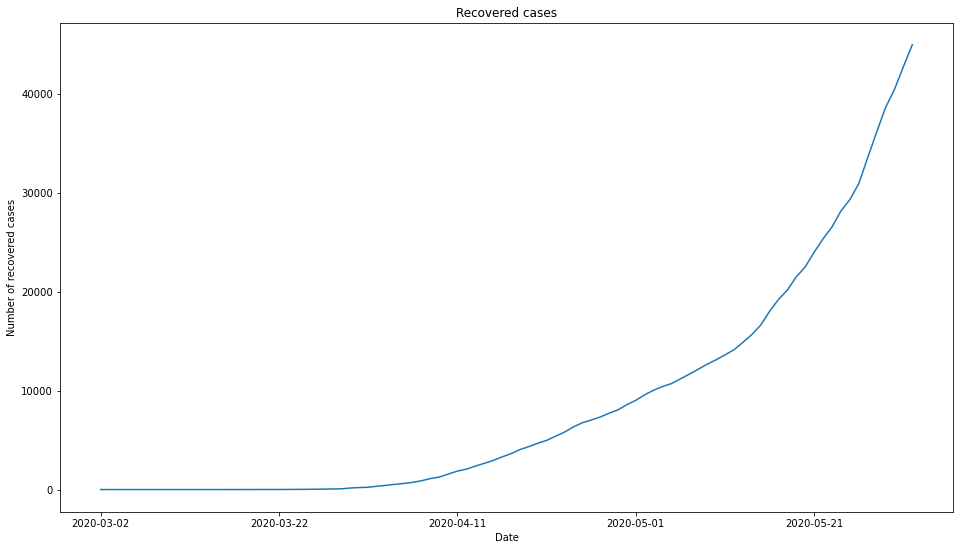

In [18]:
# Recovered Cases
recovered1 = df['Casos recuperados'].dropna()
#df['Casos recuperados'] # Chilean recovered cases

recovered1.plot(
    figsize=(16,9)).set(xlabel="Date",
           ylabel="Number of recovered cases",
           title="Recovered cases")

In [19]:
recovered1.tail()

Fecha
2020-05-28    36115.0
2020-05-29    38598.0
2020-05-30    40431.0
2020-05-31    42727.0
2020-06-01    44946.0
Name: Casos recuperados, dtype: float64

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of recovered cases'),
 Text(0.5, 1.0, 'Recovered cases')]

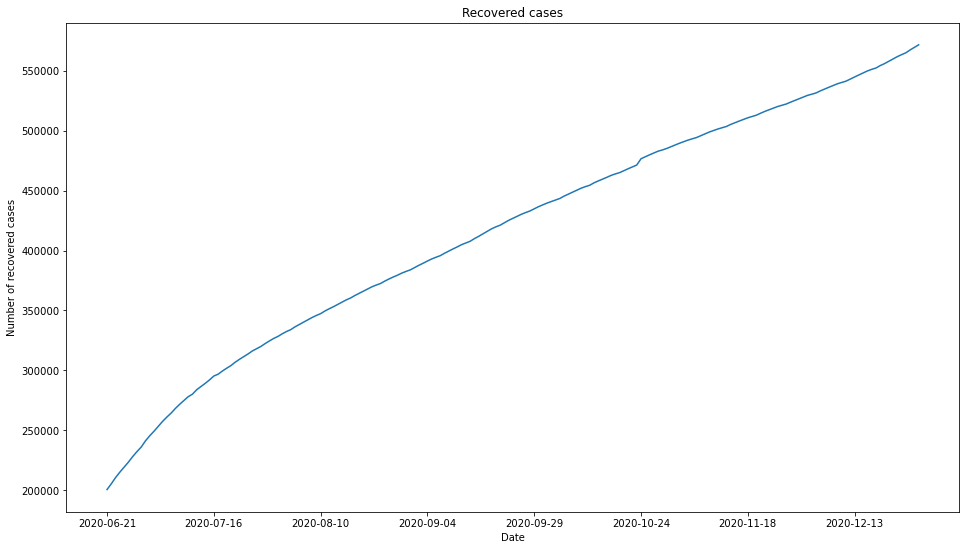

In [21]:
# Recovered Cases
recovered2 = df['Casos confirmados recuperados'].dropna()
#df['Casos recuperados'] # Chilean recovered cases

recovered2.plot(
    figsize=(16,9)).set(xlabel="Date",
           ylabel="Number of recovered cases",
           title="Recovered cases")

In [22]:
recovered2.head()

Fecha
2020-06-21    200569.0
2020-06-22    205397.0
2020-06-23    210570.0
2020-06-24    215093.0
2020-06-25    219327.0
Name: Casos confirmados recuperados, dtype: float64

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of recovered cases'),
 Text(0.5, 1.0, 'Recovered cases')]

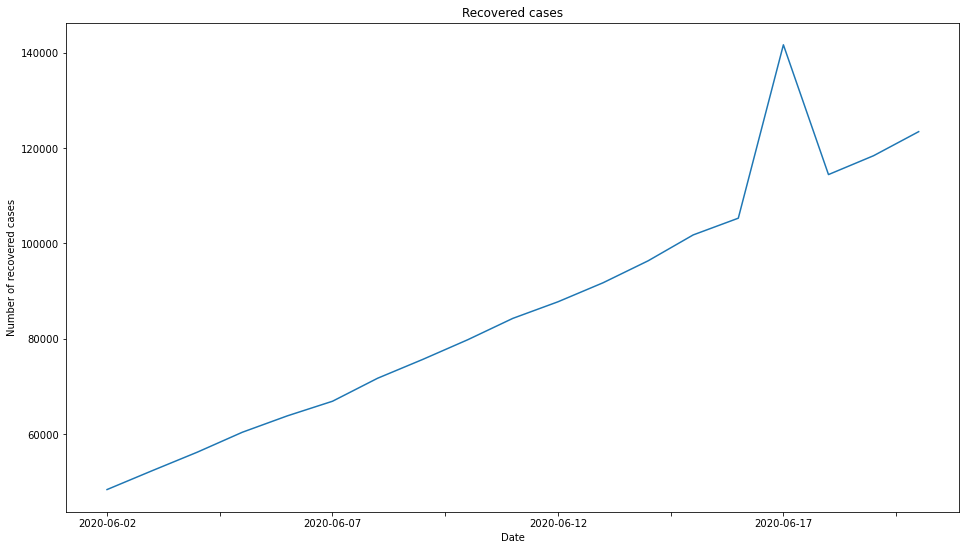

In [23]:
#Looking for recovered data from 1st to 20th June
recovered3 = df.filter(like = '2020-06-', axis=0)['Casos recuperados por FD']

recovered3 = recovered3.drop(['2020-06-01',
                             '2020-06-21',
                             '2020-06-22',
                             '2020-06-23',
                             '2020-06-24',
                             '2020-06-25',
                             '2020-06-26',
                             '2020-06-27',
                             '2020-06-28',
                             '2020-06-29',
                             '2020-06-30'])

recovered3.plot(
    figsize=(16,9)).set(xlabel="Date",
           ylabel="Number of recovered cases",
           title="Recovered cases")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of recovered cases'),
 Text(0.5, 1.0, 'Recovered cases')]

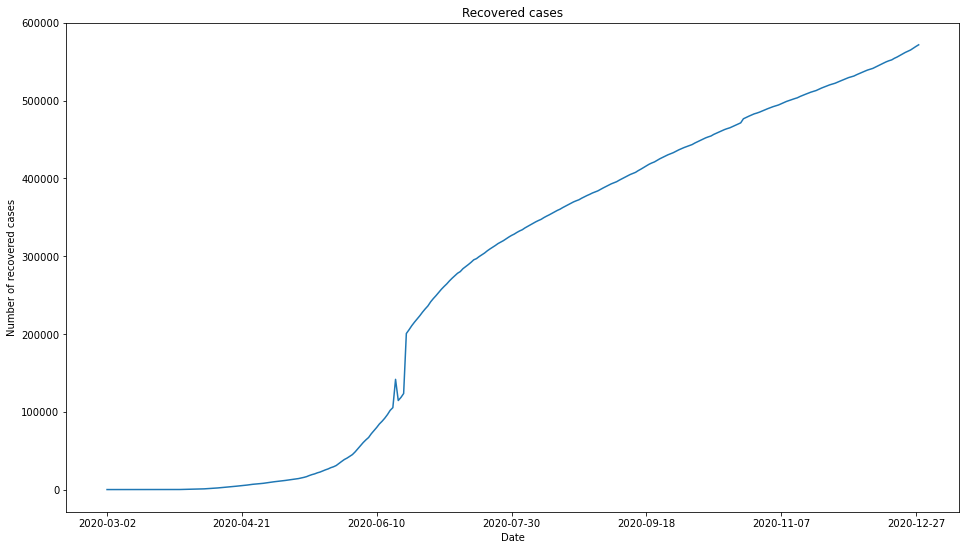

In [24]:
recovered4 = pd.concat([recovered1,recovered3,recovered2])

recovered4.plot(
    figsize=(16,9)).set(xlabel="Date",
           ylabel="Number of recovered cases",
           title="Recovered cases")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of deaths'),
 Text(0.5, 1.0, 'deaths')]

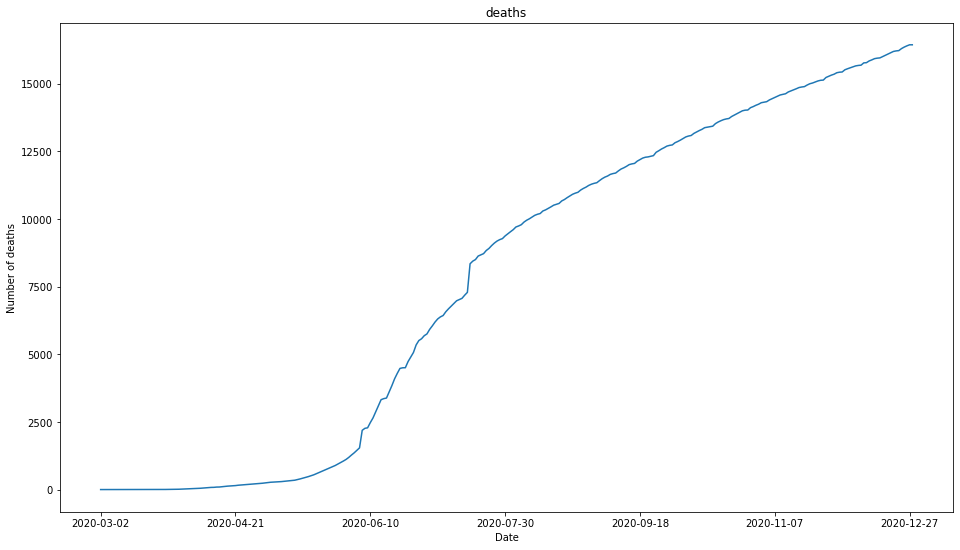

In [25]:
# Death cases
deaths = df['Fallecidos'].dropna() #death cases

deaths.plot(figsize=(16, 9)
       ).set(xlabel="Date",
             ylabel="Number of deaths", 
             title="deaths")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of susceptible cases'),
 Text(0.5, 1.0, 'Susceptible people')]

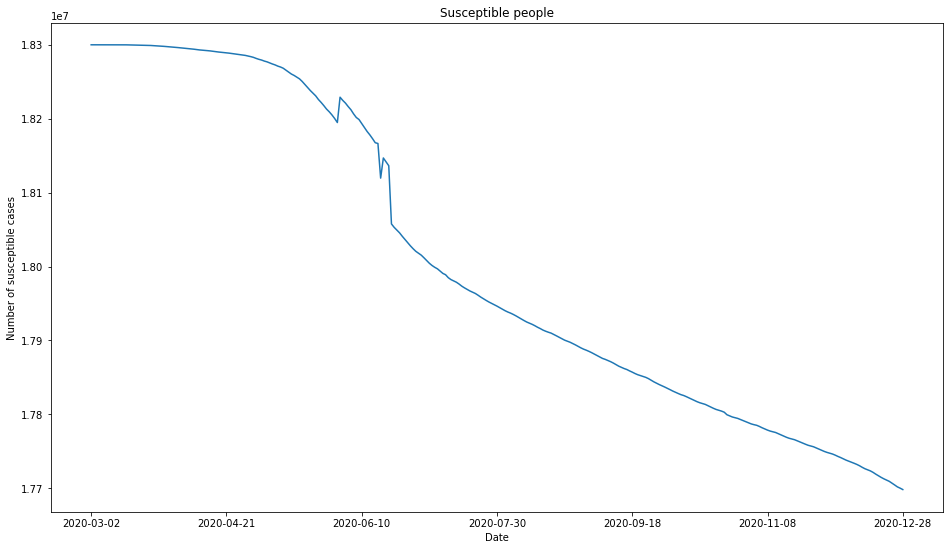

In [26]:
# Susceptible cases

susceptible = N - (infectious + recovered4 + deaths).dropna() #susceptible

susceptible.plot(figsize=(16, 9)
       ).set(xlabel="Date",
             ylabel="Number of susceptible cases", 
             title="Susceptible people")

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Number of exposed cases'),
 Text(0.5, 1.0, 'Exposed people')]

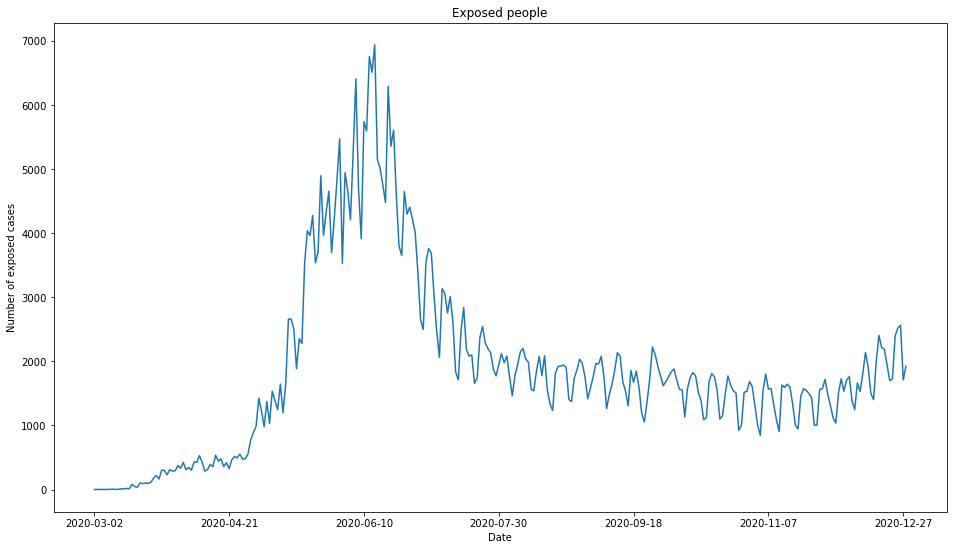

In [55]:
# Exposed cases

exposed = df['Casos nuevos totales'].dropna()

#For MA7
## exposed.rolling(7).mean()

exposed.plot(figsize=(16, 9)
       ).set(xlabel="Date",
             ylabel="Number of exposed cases", 
             title="Exposed people")

In [28]:
import matplotlib.dates as mdates
def plotreal(S, E, I, R, D):
  fig = plt.figure(figsize=(10,4))
  ax = fig.subplots(1,1)
  ax.plot(S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.set_xlabel('Date')
  ax.set_ylabel('SR cases')
  ax.xaxis.set_tick_params(length=0)
  ax.yaxis.set_tick_params(length=1)

  ax2 = ax.twinx()
  ax2.plot(I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax2.plot(D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax2.set_ylabel('EID cases')

  # format the ticks
  ax.xaxis.set_major_locator(mdates.MonthLocator())
  ax.xaxis.set_minor_locator(mdates.DayLocator())
  ax.tick_params(axis='x', labelrotation = 45)
    
  
  fig.legend(loc="upper right")

  plt.show();

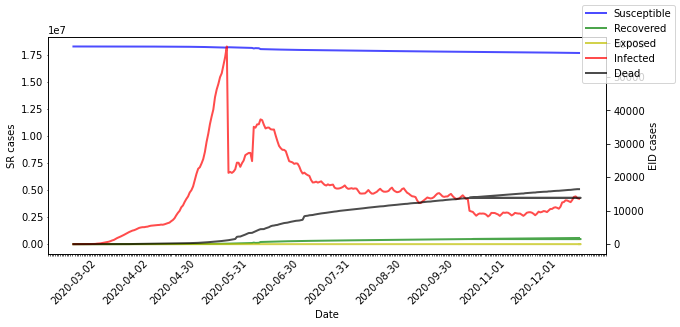

In [56]:
plotreal(susceptible,
         exposed, 
         infectious, 
         recovered4, 
         deaths
        )

# Change over time

## SIR model

### Susceptible

\begin{equation} \frac{\partial S}{\partial t} = -\beta \cdot I \cdot \frac{S}{N} \end{equation}

### Exposed

\begin{equation}\frac{\partial E}{\partial t} = \beta \cdot I \cdot \frac{S}{N} - \delta E \end{equation}

### Infectious

\begin{equation}\frac{\partial I}{\partial t} = \delta E -(1-\alpha)\cdot \gamma I -\alpha\rho I\end{equation}

### Recovered

\begin{equation}\frac{\partial R}{\partial t} = (1-\alpha)\cdot\gamma I \end{equation}


### Dead

\begin{equation}\frac{\partial R}{\partial t} = \alpha\rho I \end{equation}

In [38]:
#defining derivatives

def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt



In [39]:
N = 18300000 #Chilean population; Source: World Bank
deaths_model = 0 #deaths
recovered_model = 0 #recovered
infectious_model = 3 #infectious
susceptible_model = N -1 #susceptible
exposed_model = 0 # contracted the disease but are not yet infectious 
D = 10 # Infectious lasts
gamma = 1/D
R0 = 2 # the total number of people an infected person infects
beta = R0*gamma # infected person infects beta people per day
alpha = 0.05 # five percent death rate
rho = 1/14 # fourteen days from infection until death
delta = 1/7  # incubation period of seven days
S0, E0, I0, R0, D0 = susceptible_model, exposed_model, infectious_model, R0, deaths_model  #Initial conditions


In [40]:
t = np.linspace(0, 700) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T



In [41]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=1)
  ax.xaxis.set_tick_params(length=1)
  legend = ax.legend()
  plt.show();

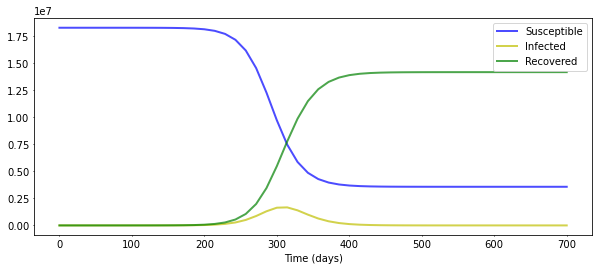

In [42]:
#SIR model

plotsir(t, S, I, R)

In [43]:
def plotseir(t, S, E, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=1)
  ax.xaxis.set_tick_params(length=1)
  legend = ax.legend()
  plt.show();

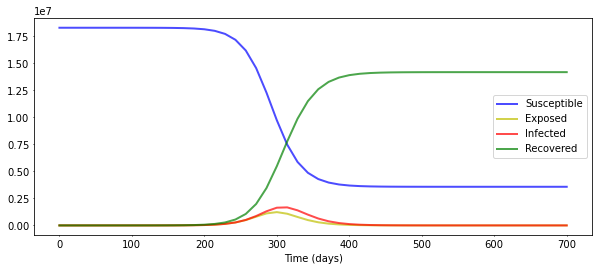

In [44]:
# SEIR model

plotseir(t, S, E, I, R)

In [45]:
def plotseird(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=1)
  ax.xaxis.set_tick_params(length=1)
  legend = ax.legend()
  plt.show();

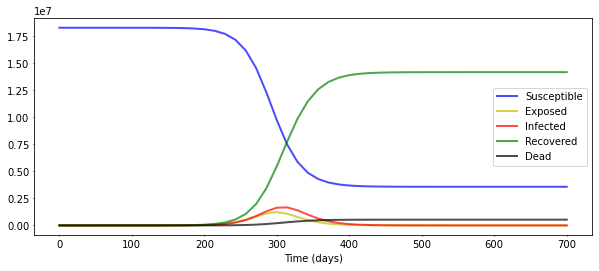

In [46]:
plotseird(t, S, E, I, R, D)

In [47]:
def plotseird(t, S, E, I, R, D):
    fig = plt.figure(figsize=(10,4))
    ax = fig.subplots(1,1)
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('SE cases')
    ax.xaxis.set_tick_params(length=1)
    ax.yaxis.set_tick_params(length=1)

    ax2 = ax.twinx()
    ax2.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax2.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax2.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax2.set_ylabel('IRD cases')
    ax2.yaxis.set_tick_params(length=1)

    fig.legend(loc='upper right')

    plt.show();

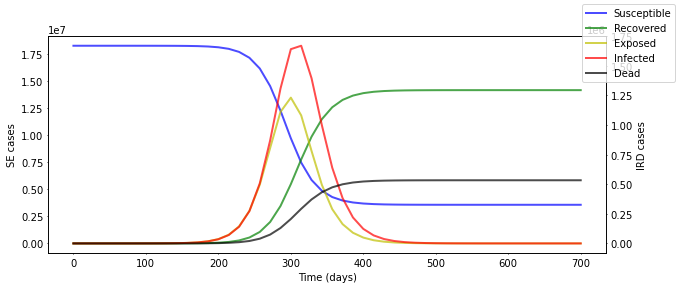

In [48]:
plotseird(t, S, E, I, R, D)